In [10]:
# 初期設定
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [11]:
def kf_predict(x, P, u, A, Bu, B, Q):
    x_new = A @ x + Bu @ u
    P_new = A @ P @ A.T + B @ Q @ B.T
    return x_new, P_new

In [12]:
def kf_update(x, P, y, C, R):
    S = R + C @ P @ C.T
    K = scipy.linalg.solve(S.T, C @ P, assume_a="pos").T
    # K = P@C.T@scipy.linalg.inv(S)
    x_new = x + K @ (y - C @ x)
    P_new = P - K @ C @ P
    return x_new, P_new, K

In [13]:
A = np.array([[1.5, -0.7], [1, 0]])
B = np.array([[0.5], [-0.5]])
Bu = np.array([[1], [0.5]])
C = np.array([[1, 0]])
Q = np.array([[0.1]])
R = np.array([[1]])

N = 1000

u = np.random.normal(0, 1, (1, N))
v = np.random.normal(0, Q, (1, N))
w = np.random.normal(0, R, (1, N))

x = np.zeros(2)
xhat = np.zeros(2)
P = np.eye(2)

Xhat = []
X = []

In [14]:
# システムのシミュレーションと推定
for k in range(N):
    y = C @ x + w[:, k]
    xhat, P, K = kf_update(xhat, P, y, C, R)
    Xhat.append(xhat)
    X.append(x)
    x = A @ x + Bu @ u[:, k] + B @ v[:, k]
    xhat, P = kf_predict(xhat, P, u[:, k], A, Bu, B, Q)

In [15]:
Xhat_np = np.array(Xhat)
X_np = np.array(X)

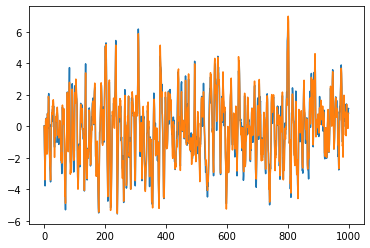

In [16]:
fig1 = plt.figure()
plt.plot(Xhat_np[:, 0])
plt.plot(X_np[:, 0])

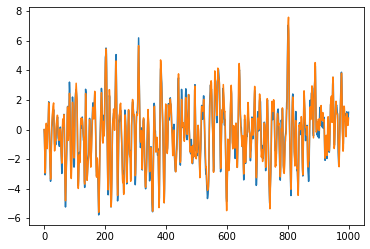

In [17]:
fig2 = plt.figure()
plt.plot(Xhat_np[:, 1])
plt.plot(X_np[:, 1])

In [9]:
plt.show()